## Simple Linear Regression Demonstration

We're using the python libraries scikit-learn and pandas

Load the training data from a csv (comma separated values) file.

In [1]:
import pandas as pd

df = pd.read_csv('http://neueda.conygre.com/pydata/ml_fc/demo2_data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


Do a quick plot of the data to check is the relationship betweeen the variables broadly linear.

In [2]:
df.plot.scatter(x='YearsExperience', y='Salary')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B873455E48>,
      dtype=object)

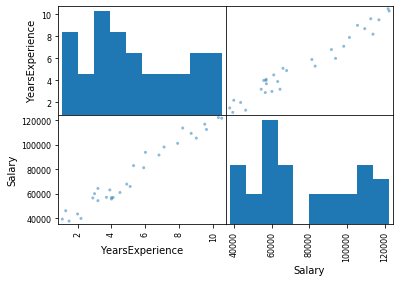

In [3]:
%matplotlib inline

from pandas.plotting import scatter_matrix

scatter_matrix(df)

Separate the 'input' and 'output' variables.

In [4]:
X = df[ ['YearsExperience'] ]

y = df['Salary']

display(X)
display(y)

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64

Keep 20% of the data aside to test the model later. The remaining 80% of data will be used to train the model.

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

display(X_train)
display(X_test)

,YearsExperience
27,9.6
11,4.0
17,5.3
22,7.9
5,2.9
16,5.1
8,3.2
14,4.5
23,8.2
20,6.8


,YearsExperience
2,1.5
28,10.3
13,4.1
10,3.9
26,9.5
24,8.7


Train a simple linear regression model on the training data.

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Plot:

* the model's prediction line in blue
* the data that was given to the model to train on in red
* the remaining untested data is plotted in green.

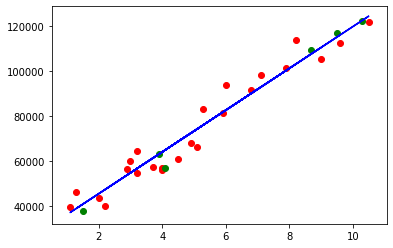

In [7]:
import matplotlib.pyplot as plt

plt.plot(X_train, model.predict(X_train), color='blue')

plt.scatter(X_train, y_train, color='red')

plt.scatter(X_test, y_test, color='green')

plt.show()

In [8]:
model.predict([[24]])

array([250281.90219213])

Get a general accuracy score of how well the model predicts the 20% of data that was kept aside.

In [9]:
from sklearn.metrics import r2_score
r2_score(y_test, model.predict(X_test))

0.988169515729126

Try a different linear regression model to see how they compare.

In [10]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=0.5)

ridge_model.fit(X_train, y_train)

Ridge(alpha=0.5)

In [11]:
from sklearn.metrics import r2_score
r2_score(y_test, ridge_model.predict(X_test))

0.9878913038174129

In [15]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor()

knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [17]:
r2_score(y_test, knn_model.predict(X_test))

0.9611580834750546